In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:
df = pd.read_csv('./ds_challenge_v2_1_data.csv')

In [60]:
df.columns

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date'],
      dtype='object')

In [61]:
for i in df.columns:
    print(df[i].value_counts())

#drop ids, 
#only 3 cities, 30k, 20k, 5k
# 5 diff registration os's
# date month, year, maybe into day of week
# signup channel
#bgc - background check date
#vehicla_added_date
#make
#model
#car year
#first completed
#
df.head

id
1        1
36447    1
36449    1
36450    1
36451    1
        ..
18231    1
18232    1
18233    1
18234    1
54681    1
Name: count, Length: 54681, dtype: int64
city_name
Strark     29557
Berton     20117
Wrouver     5007
Name: count, dtype: int64
signup_os
ios web        16632
android web    14944
windows         6776
mac             5824
other           3648
Name: count, dtype: int64
signup_channel
Paid        23938
Referral    17316
Organic     13427
Name: count, dtype: int64
signup_date
1/5/16     2489
1/4/16     2460
1/1/16     2282
1/6/16     2207
1/7/16     2078
1/21/16    2024
1/20/16    2013
1/11/16    1991
1/25/16    1912
1/26/16    1908
1/22/16    1904
1/3/16     1886
1/27/16    1838
1/2/16     1814
1/8/16     1788
1/12/16    1747
1/19/16    1745
1/13/16    1718
1/28/16    1706
1/23/16    1677
1/14/16    1671
1/9/16     1665
1/10/16    1614
1/29/16    1598
1/15/16    1595
1/18/16    1590
1/24/16    1489
1/16/16    1484
1/30/16    1466
1/17/16    1322
Name: count, dtype: 

<bound method NDFrame.head of           id city_name    signup_os signup_channel signup_date bgc_date  \
0          1    Strark      ios web           Paid      1/2/16      NaN   
1          2    Strark      windows           Paid     1/21/16      NaN   
2          3   Wrouver      windows        Organic     1/11/16  1/11/16   
3          4    Berton  android web       Referral     1/29/16   2/3/16   
4          5    Strark  android web       Referral     1/10/16  1/25/16   
...      ...       ...          ...            ...         ...      ...   
54676  54677    Strark        other           Paid     1/15/16      NaN   
54677  54678    Strark        other           Paid     1/21/16      NaN   
54678  54679    Strark      ios web        Organic      1/6/16      NaN   
54679  54680    Berton  android web           Paid     1/18/16      NaN   
54680  54681    Berton      ios web        Organic     1/27/16      NaN   

      vehicle_added_date vehicle_make vehicle_model  vehicle_year  \


In [62]:
df['signup_date'] = pd.to_datetime(df['signup_date'], format = '%m/%d/%y')
df['bgc_date'] = pd.to_datetime(df['bgc_date'], format = '%m/%d/%y')
df['vehicle_added_date'] = pd.to_datetime(df['vehicle_added_date'], format = '%m/%d/%y')
df['first_completed_date'] = pd.to_datetime(df['first_completed_date'], format = '%m/%d/%y')

df_dated = df
# df_dated['signup_date_day'] = pd.to_datetime(df['signup_date'], format = '%m/%d/%y')
# df_dated['bgc_date_day'] = pd.to_datetime(df['bgc_date'], format = '%m/%d/%y')
# df_dated['vehicle_added_date_day'] = pd.to_datetime(df['vehicle_added_date'], format = '%m/%d/%y')
# df_dated['first_completed_date_day'] = pd.to_datetime(df['first_completed_date'], format = '%m/%d/%y')



df

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,Strark,other,Paid,2016-01-15,NaT,NaT,NaN,NaN,NaN,NaT
54677,54678,Strark,other,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT
54678,54679,Strark,ios web,Organic,2016-01-06,NaT,NaT,NaN,NaN,NaN,NaT
54679,54680,Berton,android web,Paid,2016-01-18,NaT,NaT,NaN,NaN,NaN,NaT


In [95]:
df_dated['bgc_after_signup'] = (pd.to_datetime(df['bgc_date'], format = '%m/%d/%y') - pd.to_datetime(df['signup_date'], format = '%m/%d/%y')).dt.days
df_dated['vehicle_add_after_signup'] = (pd.to_datetime(df['vehicle_added_date'], format = '%m/%d/%y') - pd.to_datetime(df['signup_date'], format = '%m/%d/%y')).dt.days
df_dated['completed_after_signup'] = (pd.to_datetime(df['first_completed_date'], format = '%m/%d/%y') - pd.to_datetime(df['signup_date'], format = '%m/%d/%y')).dt.days
df_dated['vehicle_after_bgc'] = (pd.to_datetime(df['vehicle_added_date'], format = '%m/%d/%y') - pd.to_datetime(df['bgc_date'], format = '%m/%d/%y')).dt.days
df_dated['completed_after_bgc'] = (pd.to_datetime(df['first_completed_date'], format = '%m/%d/%y') - pd.to_datetime(df['bgc_date'], format = '%m/%d/%y')).dt.days
df_dated['completed_after_vehicle'] = (pd.to_datetime(df['first_completed_date'], format = '%m/%d/%y') - pd.to_datetime(df['vehicle_added_date'], format = '%m/%d/%y')).dt.days



df_dropped = df_dated.drop(columns = ['signup_date', 'vehicle_added_date', 'first_completed_date', 'bgc_date', 'id'])

df_one_hot = pd.get_dummies(df_dropped, drop_first=True)


In [96]:
df_one_hot['driver'] = df['first_completed_date'].notna()

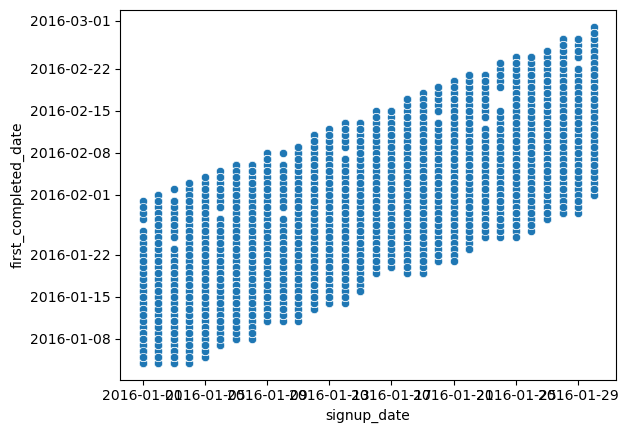

In [97]:
sns.scatterplot(x = 'signup_date', y = 'first_completed_date', data = df)
# sns.scatterplot(x = 'signup_date', y = 'bgc_date', data = df)
# sns.scatterplot(x = 'signup_date', y = 'vehicle_added_date', data = df)
plt.show()



In [98]:
correlations = df_one_hot.corr()

In [99]:
# Get absolute correlations with target
target_corr = correlations['driver'].drop('driver').abs()

# Sort from highest to lowest correlation
sorted_corr = target_corr.sort_values(ascending=False)

# Top N most correlated features (e.g., top 5)
top_features = sorted_corr.head(15)

print("Top correlated features with target:\n", top_features)

Top correlated features with target:
 vehicle_add_after_signup    0.586626
vehicle_after_bgc           0.419967
bgc_after_signup            0.305676
vehicle_make_Toyota         0.288903
vehicle_make_Honda          0.209505
signup_channel_Referral     0.187017
vehicle_make_Nissan         0.157125
signup_channel_Paid         0.140678
vehicle_model_Civic         0.130723
vehicle_make_Ford           0.128996
vehicle_model_Camry         0.123293
vehicle_model_Corolla       0.121518
vehicle_model_Prius V       0.118817
vehicle_model_Prius         0.117888
vehicle_model_Accord        0.112932
Name: driver, dtype: float64


In [100]:
#cleaning



df_one_hot = df_one_hot.fillna(0)


In [108]:
from sklearn.model_selection import train_test_split



xtrain, xtest, ytrain, ytest = train_test_split(df_one_hot.drop(columns = [ 'driver']), df_one_hot['driver'],stratify=df_one_hot['driver'], test_size = .2)


df_one_hot
for i in df_one_hot.columns:
    print(i)

vehicle_year
bgc_after_signup
vehicle_add_after_signup
completed_after_signup
vehicle_after_bgc
completed_after_bgc
completed_after_vehicle
city_name_Strark
city_name_Wrouver
signup_os_ios web
signup_os_mac
signup_os_other
signup_os_windows
signup_channel_Paid
signup_channel_Referral
vehicle_make_Audi
vehicle_make_Autobot
vehicle_make_BMW
vehicle_make_Bentley
vehicle_make_Bicycle
vehicle_make_Bike
vehicle_make_Buick
vehicle_make_Cadillac
vehicle_make_Chevrolet
vehicle_make_Chrysler
vehicle_make_Dodge
vehicle_make_Fiat
vehicle_make_Ford
vehicle_make_GMC
vehicle_make_Honda
vehicle_make_Hummer
vehicle_make_Hyundai
vehicle_make_Infiniti
vehicle_make_Isuzu
vehicle_make_Jaguar
vehicle_make_Jeep
vehicle_make_Kia
vehicle_make_Land Rover
vehicle_make_Lexus
vehicle_make_Lincoln
vehicle_make_Maserati
vehicle_make_Mazda
vehicle_make_Mercedes-Benz
vehicle_make_Mercury
vehicle_make_Mini
vehicle_make_Mitsubishi
vehicle_make_Nissan
vehicle_make_Oldsmobile
vehicle_make_Pontiac
vehicle_make_Porsche
vehi

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, pred)
print("Accuracy:", accuracy)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

Accuracy: 0.9996342689951541
[[9710    0]
 [   4 1223]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9710
        True       1.00      1.00      1.00      1227

    accuracy                           1.00     10937
   macro avg       1.00      1.00      1.00     10937
weighted avg       1.00      1.00      1.00     10937



In [112]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 1, n_estimators = 100)
classifier.fit(xtrain, ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

Accuracy: 0.9996342689951541
[[9710    0]
 [   4 1223]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9710
        True       1.00      1.00      1.00      1227

    accuracy                           1.00     10937
   macro avg       1.00      1.00      1.00     10937
weighted avg       1.00      1.00      1.00     10937



In [107]:
df_one_hot['driver'].value_counts()

driver
False    48544
True      6137
Name: count, dtype: int64